In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize and reshape the images
train_images = train_images.reshape((-1, 28, 28, 1)) / 255.0
test_images = test_images.reshape((-1, 28, 28, 1)) / 255.0

# One-hot encode labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [3]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Convolutional layer with 32 filters and 3x3 kernel
    MaxPooling2D((2, 2)),  # Max pooling layer with 2x2 pool size
    Conv2D(64, (3, 3), activation='relu'),  # Convolutional layer with 64 filters and 3x3 kernel
    MaxPooling2D((2, 2)),  # Max pooling layer with 2x2 pool size
    Flatten(),  # Flatten layer to convert 2D features to 1D
    Dense(128, activation='relu'),  # Fully connected layer with 128 neurons
    Dense(10, activation='softmax')  # Output layer with 10 neurons for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_split=0.2)


c:\Users\shant\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8987 - loss: 0.3290 - val_accuracy: 0.9834 - val_loss: 0.0559
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9842 - loss: 0.0487 - val_accuracy: 0.9856 - val_loss: 0.0479
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9896 - loss: 0.0314 - val_accuracy: 0.9881 - val_loss: 0.0404
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9925 - loss: 0.0227 - val_accuracy: 0.9896 - val_loss: 0.0369
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9945 - loss: 0.0168 - val_accuracy: 0.9889 - val_loss: 0.0414


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9892 - loss: 0.0347
Test accuracy (CNN): 99.14%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


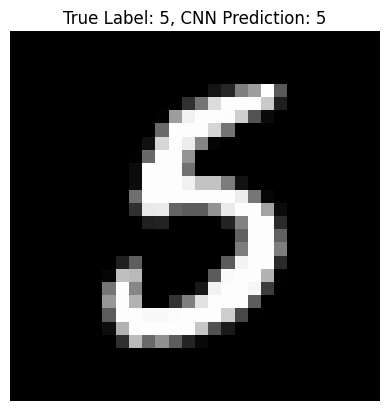

In [4]:

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy (CNN): {test_accuracy*100:.2f}%")

# Choose a random image from test dataset
index = np.random.randint(0, len(test_images))
image = test_images[index].reshape((28, 28))  # Reshape to 28x28
true_label = np.argmax(test_labels[index])

# Reshape and predict using the CNN model
cnn_prediction = np.argmax(model.predict(np.expand_dims(test_images[index], axis=0)))

# Plot the image and display true and predicted labels
plt.imshow(image, cmap='gray')
plt.title(f"True Label: {true_label}, CNN Prediction: {cnn_prediction}")
plt.axis('off')
plt.show()